## Anomaly Detection

In [1]:
!pip install pyod

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


## 가상데이터 생성

In [1]:
from pyod.utils.data import generate_data
from pyod.utils.example import visualize
contamination = 0.05  # percentage of outliers
n_train = 2000  # number of training points
n_test = 1000  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/opt/conda/lib/python3.8/site-packages/pyod/utils/data.py:186: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


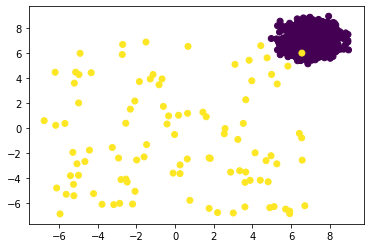

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

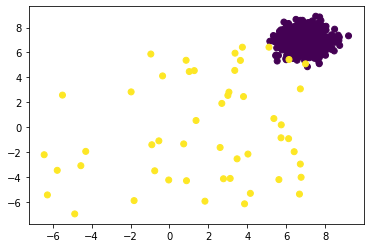

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

## 이상탐지 모듈 불러오기

In [5]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.lof import LOF

## Fully Unsupervised Approach

In [6]:
clf = KNN(n_neighbors=5)
# Suppose that we don't know the true label
# In this case, we just learn from whole data
clf.fit(X_train) 

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [7]:
# making a prediction
y_pred=clf.predict(X_test)

## Evaluation

In [9]:
## Since we know the true label
## Let's evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from pyod.utils.utility import precision_n_scores

# accuracy
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}") #(tp+tn)/(tp+tn+fp+fn)
print(f"precision_score: {precision_score(y_test,y_pred)}") #(tp)/(tp+fp)
print(f"recall_score: {recall_score(y_test,y_pred)}") #(tp)/(tp+fn)

score = clf.decision_function(X_test)
print(f"ROC_AUC: {roc_auc_score(y_test,score)}") #(tp)/(tp+fn)
print(f"Prec@N: {precision_n_scores(y_test,score)}")



accuracy_score: 0.945
precision_score: 0.47619047619047616
recall_score: 1.0
ROC_AUC: 0.9995789473684211
Prec@N: 0.94


In [10]:
def evaluate(y_test, y_pred, score):    
    print(f"accuracy_score: {accuracy_score(y_test,y_pred)}") #(tp+tn)/(tp+tn+fp+fn)
    print(f"precision_score: {precision_score(y_test,y_pred)}") #(tp)/(tp+fp)
    print(f"recall_score: {recall_score(y_test,y_pred)}") #(tp)/(tp+fn)
    print(f"ROC_AUC: {roc_auc_score(y_test,score)}") #(tp)/(tp+fn)
    print(f"Prec@N: {precision_n_scores(y_test,score)}")

## Semi-supervised

In [11]:
clf = KNN(n_neighbors=5)
clf.fit(X_train[y_train==0])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [14]:
y_pred = clf.predict(X_test)
score = clf.decision_function(X_test)

In [15]:
evaluate(y_test,y_pred,score)

accuracy_score: 0.891
precision_score: 0.31446540880503143
recall_score: 1.0
ROC_AUC: 0.9995789473684211
Prec@N: 0.94


## ParamTuning Example

In [16]:
from sklearn.model_selection import cross_val_score
KNN()
contamination=[0.01,0.05,0.1,0.15,0.2] #hyper parameters for contamination
n_neighbors=[1,3,5,7,9] # hyper parameters for neighbors
for c in contamination:
    for n in n_neighbors:
        print("="*10)
        clf = KNN(n_neighbors=n,contamination=c)
        clf.fit(X_train[y_train==0])
        y_pred = clf.predict(X_test)
        score = clf.decision_function(X_test)
        print(f"contamination: {c} and n_nighbors: {n}")
        evaluate(y_test,y_pred,score)

    

contamination: 0.01 and n_nighbors: 1
accuracy_score: 0.987
precision_score: 0.8032786885245902
recall_score: 0.98
ROC_AUC: 0.9990947368421053
Prec@N: 0.94
contamination: 0.01 and n_nighbors: 3
accuracy_score: 0.984
precision_score: 0.7575757575757576
recall_score: 1.0
ROC_AUC: 0.9994526315789474
Prec@N: 0.94
contamination: 0.01 and n_nighbors: 5
accuracy_score: 0.986
precision_score: 0.78125
recall_score: 1.0
ROC_AUC: 0.9995789473684211
Prec@N: 0.94
contamination: 0.01 and n_nighbors: 7
accuracy_score: 0.988
precision_score: 0.8166666666666667
recall_score: 0.98
ROC_AUC: 0.9994736842105263
Prec@N: 0.94
contamination: 0.01 and n_nighbors: 9
accuracy_score: 0.985
precision_score: 0.7777777777777778
recall_score: 0.98
ROC_AUC: 0.9994315789473683
Prec@N: 0.94
contamination: 0.05 and n_nighbors: 1
accuracy_score: 0.944
precision_score: 0.4716981132075472
recall_score: 1.0
ROC_AUC: 0.9990947368421053
Prec@N: 0.94
contamination: 0.05 and n_nighbors: 3
accuracy_score: 0.947
precision_score: 0

## For Actual Dataset

In [24]:
import numpy as np
import pandas as pd
data = np.load('13_fraud.npz', allow_pickle=True)
# data = np.load('34_smtp.npz', allow_pickle=True)
# data = np.load('16_http.npz', allow_pickle=True)
# df=pd.read_csv('f.csv')
# df
X, y = data['X'], data['y']

In [30]:
anomal_X, anomal_y = X[y==1], y[y==1]
normal_X, normal_y = X[y==0], y[y==0]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(normal_X, normal_y, shuffle=True, test_size=0.3)

In [40]:
X_train.shape

(199020, 29)

In [49]:
X_test=np.vstack([X_test,anomal_X])
y_test=np.hstack([y_test,anomal_y])


In [53]:
X_test.shape

(88739, 29)

## Using supervised model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from pyod.utils.utility import precision_n_scores
clf = LGBMClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score = clf.predict_proba(X_test)[:,1]
evaluate(y_test,y_pred,score)


ValueError: Found input variables with inconsistent numbers of samples: [85787, 88739]

In [130]:
from sklearn.metrics import roc_auc_score

In [23]:
contamination=[0.0005,0.001,0.01,0.1]
n_estimators=[50,100,150,200]
for c in contamination:
    for n in n_estimators:
        clf = IForest(contamination=c,n_estimators=n)
        clf.fit(X_train[y_train==0])
        y_pred=clf.predict(X_test)
        score=clf.predict_proba(X_test)[:,1]
        print('='*10)
        print(f'contamination: {c}, n_estimators: {n}')        
        evaluate(y_test,y_pred,score)
        

contamination: 0.0005, n_estimators: 50
accuracy_score: 0.997940147232658
precision_score: 0.26666666666666666
recall_score: 0.10810810810810811
ROC_AUC: 0.9448416703238205
Prec@N: 0.2635135135135135
contamination: 0.0005, n_estimators: 100
accuracy_score: 0.9978114064346991
precision_score: 0.1320754716981132
recall_score: 0.0472972972972973
ROC_AUC: 0.9338393936465335
Prec@N: 0.18243243243243243
contamination: 0.0005, n_estimators: 150
accuracy_score: 0.9979869620682794
precision_score: 0.33783783783783783
recall_score: 0.16891891891891891
ROC_AUC: 0.9441870265834156
Prec@N: 0.27702702702702703
contamination: 0.0005, n_estimators: 200
accuracy_score: 0.997905036105942
precision_score: 0.26153846153846155
recall_score: 0.11486486486486487
ROC_AUC: 0.9421481567152474
Prec@N: 0.28378378378378377
contamination: 0.001, n_estimators: 50
accuracy_score: 0.9978114064346991
precision_score: 0.3488372093023256
recall_score: 0.30405405405405406
ROC_AUC: 0.9473089024894523
Prec@N: 0.310810810810